In [3]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns



In [4]:
df = pd.read_csv("Ecommerce_customers.csv")
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [6]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


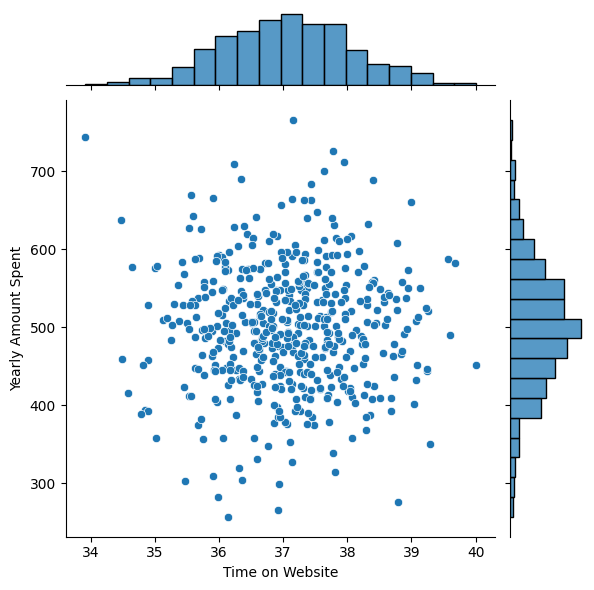

In [7]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=df) # scatter plot + Histogram

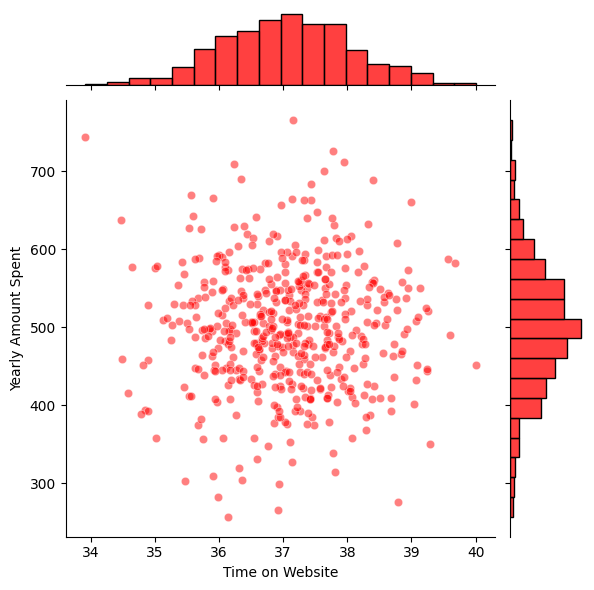

In [8]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=df, alpha=0.5, color='red')# more points together-> darker
#alpha is a value between 0 and 1: the closer to 1, the more opaque the points will be.
#alpha = 0.3 → 30% visible, 70% transparent

we cant see clear correlation here, so we check the amount with time on app

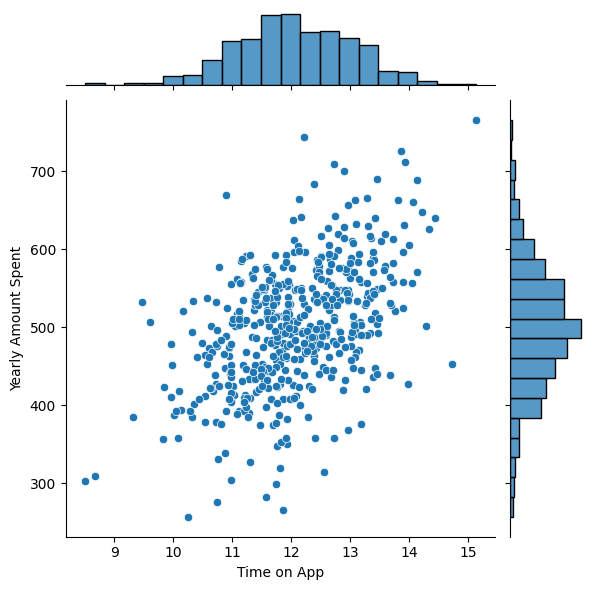

In [9]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=df)

there is a little correlation. the more time spent on app, the more amount spent

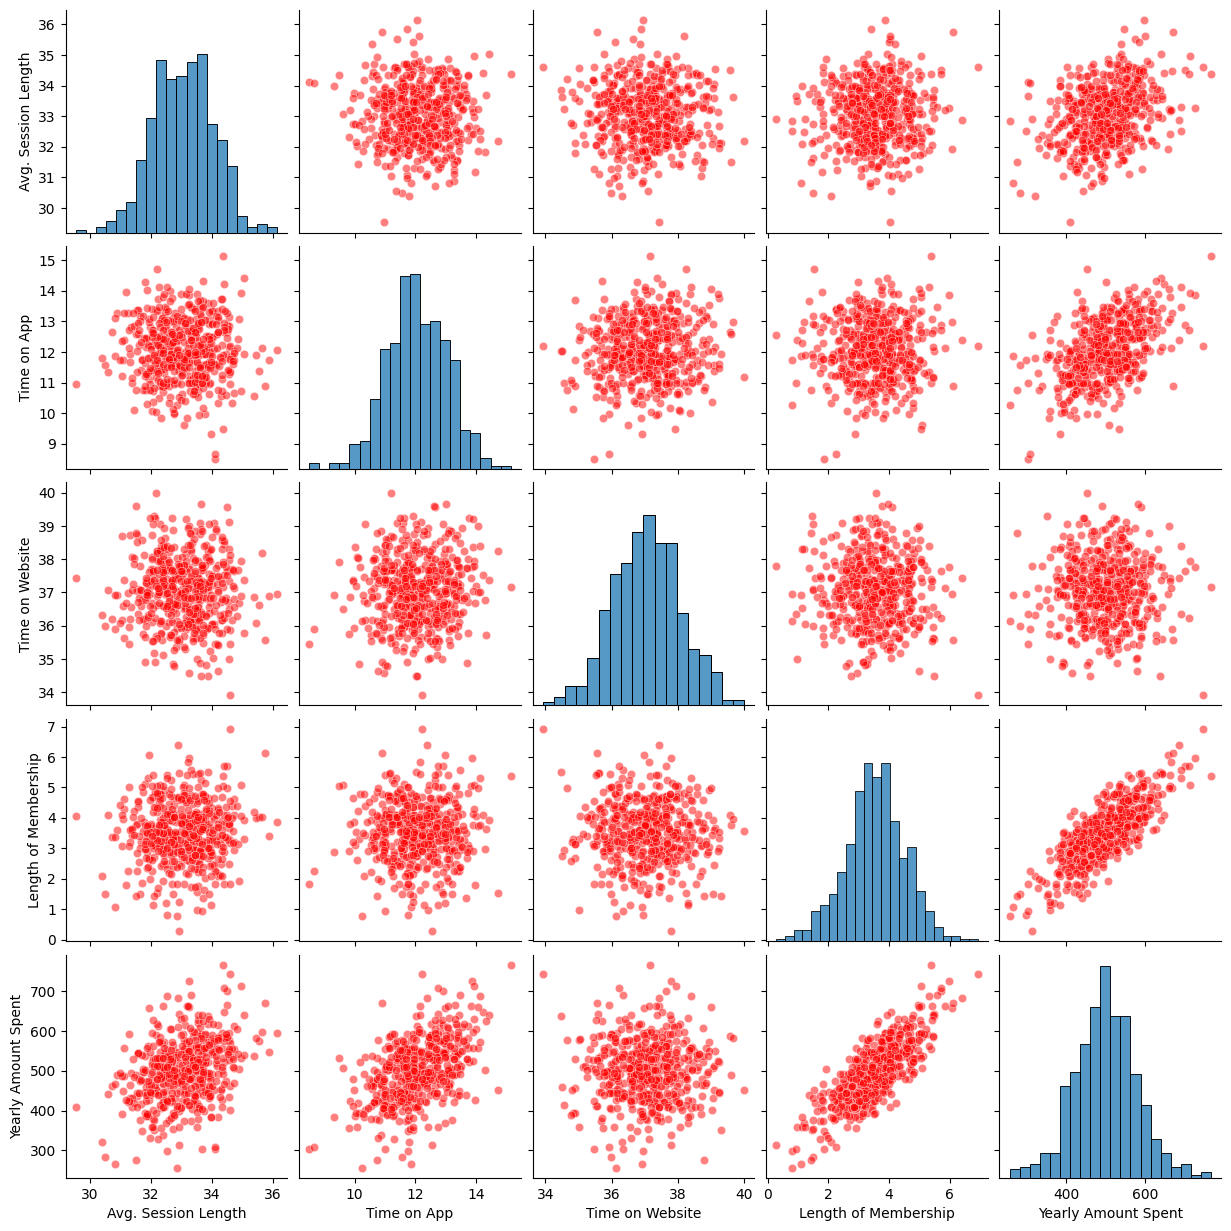

In [10]:
sns.pairplot(df,kind='scatter',plot_kws={'alpha':0.5,'color':'red'}) #correlation between all numerical columns

the yearly amount spent shows the last lines.
-there is a faint correlation between yearly amount spent and avg-session length
-time on website dont show any correlation
- length on membership shows a strong correlation

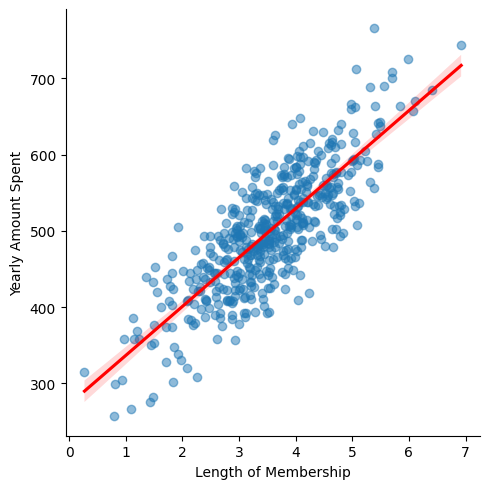

In [11]:
#linear model plot
sns.lmplot(
    x='Length of Membership',
    y='Yearly Amount Spent',
    data=df,
    scatter_kws={'alpha': 0.5},    # transparency for points
    line_kws={'color':'red'}       # color for regression line
) 
 #line_kws-> dictionary containing properties that control how a plotted line should look(line properties) 

this line is going to measure the distance from each point to the line(red-blurred) - to get a line that has least SSR(sum of squares)
we try to get a wquation for this line to discribe 1D,2D,3D...nD( D-dimentions)<->to do this we need sklearn

In [12]:
from sklearn.model_selection import train_test_split #to split data into training and testing sets


we are going to split the data into training set and testing set. reason to do this is for 70% we going to create the model (function) and the other 30% we use to test the model( to see the function is correct)
so that we can use the model for predictions

In [13]:
X =df[["Time on App","Time on Website","Length of Membership","Avg. Session Length"]]
y=df["Yearly Amount Spent"] 

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101) 

x_train,y_train -70%, x_test,y_test-30% 
test_size- how big the testing section (0.3 means 30% of the dataset)
random_state-this doesnt change anything, it Controls the shuffle.Using the same number gives same split every time, making results repeatable


In [17]:
X_train

,Time on App,Time on Website,Length of Membership,Avg. Session Length
202,11.340036,37.039514,3.811248,31.525752
428,14.039867,37.022269,3.738225,31.862741
392,11.514949,37.128039,4.662845,33.258238
86,12.517666,37.151921,2.669942,33.877779
443,12.504220,37.645839,4.051382,33.025020
...,...,...,...,...
63,11.670066,37.408748,3.414688,32.789773
326,10.999684,38.442767,4.243813,33.217188
337,12.461147,37.428997,2.974737,31.827979
11,11.584783,37.087926,3.713209,33.879361


350 rows is the split for train

In [18]:
#training the model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()#initialize a instance of LinearRegression
lm.fit(X_train,y_train) #fit the model to training data - for each X, should give the corresponding y   

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [19]:
lm.coef_

array([38.59015875,  0.19040528, 61.27909654, 25.98154972])

In [ ]:
cdf = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
print(cdf) #print the coefficients for each feature in X

                      Coefficient
Time on App             38.590159
Time on Website          0.190405
Length of Membership    61.279097
Avg. Session Length     25.981550


In [ ]:
#predicting test data
predictions = lm.predict(X_test) 
predictions

array([456.44186104, 402.72005312, 409.2531539 , 591.4310343 ,
       590.01437275, 548.82396607, 577.59737969, 715.44428115,
       473.7893446 , 545.9211364 , 337.8580314 , 500.38506697,
       552.93478041, 409.6038964 , 765.52590754, 545.83973731,
       693.25969124, 507.32416226, 573.10533175, 573.2076631 ,
       397.44989709, 555.0985107 , 458.19868141, 482.66899911,
       559.2655959 , 413.00946082, 532.25727408, 377.65464817,
       535.0209653 , 447.80070905, 595.54339577, 667.14347072,
       511.96042791, 573.30433971, 505.02260887, 565.30254655,
       460.38785393, 449.74727868, 422.87193429, 456.55615271,
       598.10493696, 449.64517443, 615.34948995, 511.88078685,
       504.37568058, 515.95249276, 568.64597718, 551.61444684,
       356.5552241 , 464.9759817 , 481.66007708, 534.2220025 ,
       256.28674001, 505.30810714, 520.01844434, 315.0298707 ,
       501.98080155, 387.03842642, 472.97419543, 432.8704675 ,
       539.79082198, 590.03070739, 752.86997652, 558.27

Text(0, 0.5, 'Predicted Values')

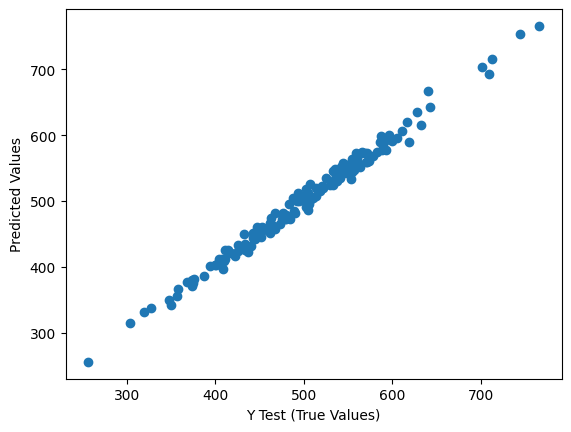

In [22]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test (True Values)')
plt.ylabel('Predicted Values')


Text(0, 0.5, 'Predicted Values')

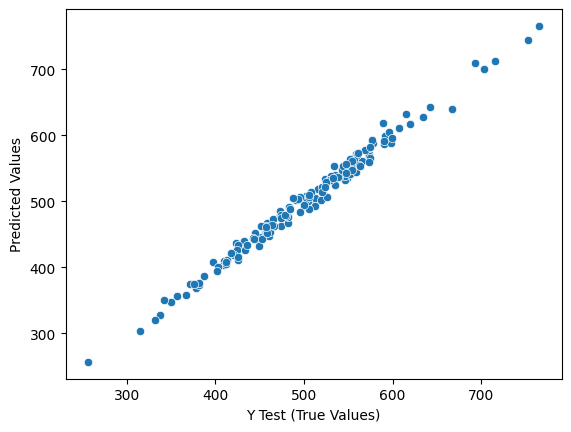

In [23]:
sns.scatterplot(x=predictions, y=y_test)
plt.xlabel('Y Test (True Values)')
plt.ylabel('Predicted Values')


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error 
import math


In [ ]:
print('MAE:',mean_absolute_error(y_test,predictions))
print('MSE:',mean_squared_error(y_test,predictions))        
print('RMSE:',math.sqrt(mean_squared_error(y_test,predictions)))

MAE: 7.228148653430813
MSE: 79.81305165097409
RMSE: 8.933815066978614


MAE- avg distance from a data point to the line- here avg distance is nearly 7 units
MSE - Squares errors → large errors are penalized more , If error = 5, contribution = 25. This forces the model to reduce big mistakes.
RMSE - Square root of MSE.


In [25]:
#residuals
residuals = y_test - predictions
residuals

18    -4.126186
361   -1.686918
104    0.816457
4      7.975058
156   -3.858503
         ...   
147    1.431172
346    3.977230
423    3.521249
17    -3.822028
259   -0.080551
Name: Yearly Amount Spent, Length: 150, dtype: float64

residuals are supposed to be random. if not, it means the nodel is biased toward something.

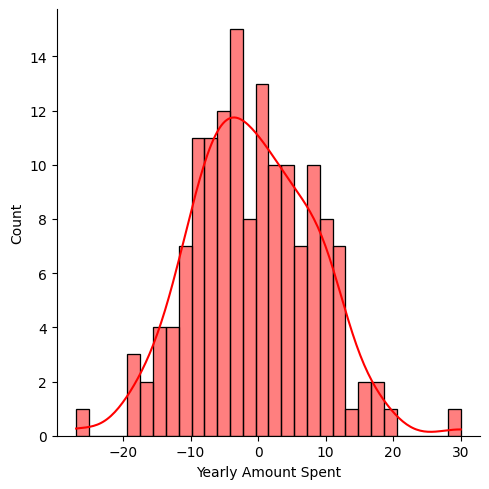

In [26]:
#checking randomness of residuals
sns.displot(residuals, bins=30, kde=True, color='red')

The residuals are slightly symmetric, the residuals are normally distributed

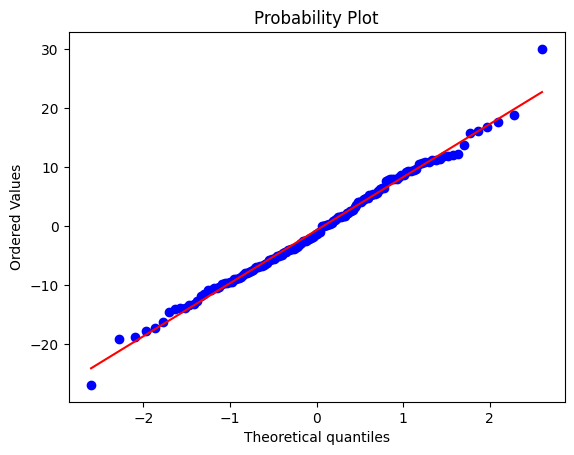

In [27]:
#Q-Q plot
import pylab
import scipy.stats as stats
stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()

residuals follows a straight line, so residuals are normally distributed.